In [1]:
# stephanie's sandbox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px


In [2]:
def clean_raw_data(clean_df, raw_data_file, skip):
    raw_data = pd.read_csv(raw_data_file, sep='\t', header=None, skiprows=skip, encoding='latin-1')
    data_col = raw_data[0]

    for row in range(0, len(data_col)):

        data_row = list(map(str, data_col[row].split())) # reformat to make string into list delimited by spaces
        
        add_row = {} # initialize, and clear dictionary for each row

        for i in range(0, len(data_row)):
            add_row = {'year': data_row[0], 
                'month': data_row[1],
                'timestamp': pd.Timestamp(year=int(data_row[0]), month=int(data_row[1]), day=1),
                'monthly_anom': data_row[2],
                'monthly_unc': data_row[3], 
                'one_yr_anom': data_row[4], 
                'one_yr_unc': data_row[5], 
                'five_yr_anom': data_row[6], 
                'five_yr_unc': data_row[7], 
                'ten_yr_anom': data_row[8], 
                'ten_yr_unc': data_row[9], 
                'twenty_yr_anom': data_row[10], 
                'twenty_yr_unc': data_row[11]}

        clean_df = clean_df._append(add_row, ignore_index=True) # append is being depricated, todo: use concat or merge

    # cast year and  month as  int - todo, make timestamp
    clean_df['year'] = clean_df['year'].astype(int)
    clean_df['month'] = clean_df['month'].astype(int)

    # cast weather data (columns 2-5) as floats
    clean_df['monthly_anom'] = clean_df['monthly_anom'].astype(float)
    clean_df['monthly_unc'] = clean_df['monthly_unc'].astype(float)
    clean_df['one_yr_anom'] = clean_df['one_yr_anom'].astype(float)
    clean_df['one_yr_unc'] = clean_df['one_yr_unc'].astype(float)

    clean_df['five_yr_anom'] = clean_df['five_yr_anom'].astype(float)
    clean_df['five_yr_unc'] = clean_df['five_yr_unc'].astype(float) 

    clean_df['ten_yr_anom'] = clean_df['ten_yr_anom'].astype(float)
    clean_df['ten_yr_unc']  = clean_df['ten_yr_unc'].astype(float)   

    clean_df['twenty_yr_anom'] = clean_df['twenty_yr_anom'].astype(float)
    clean_df['twenty_yr_unc']  = clean_df['twenty_yr_unc'].astype(float)  

    # filter data to years after 1960
    clean_df = clean_df[clean_df['year'] >= 1960]
  
    return clean_df

In [3]:
def get_season_df(df, season):
    summer_months = [1, 2, 12]
    autumn_months = [3, 4, 5]
    winter_months = [6, 7, 8]
    spring_months = [9, 10,11]

    if season == 'summer':
        season_df = df[df['month'].isin(summer_months)]
    elif season == 'autumn':
        season_df = df[df['month'].isin(autumn_months)]
    elif season == 'winter':
        season_df = df[df['month'].isin(winter_months)]
    elif season == 'spring':
        season_df = df[df['month'].isin(spring_months)]
    else: 
        print('Invalid season')
        return df

    return season_df

In [4]:
# files and constants
south_america_file = 'SouthAmerica_raw.txt'
lima_file = 'Lima_Peru_raw.txt'
santiago_file = 'Santiago_Chile_raw.txt'
saopaulo_file = 'SaoPaulo_Brazil_raw.txt'

weather_cols = ['year', 'month', 'monthly_anom', 'monthly_unc', 'one_yr_anom', 'one_yr_unc']


In [5]:
# clean data
south_data = pd.DataFrame(columns=weather_cols)
south_data = clean_raw_data(south_data, south_america_file, 71)

lima_data = pd.DataFrame(columns=weather_cols)
lima_data = clean_raw_data(lima_data, lima_file, 71)

santiago_data = pd.DataFrame(columns=weather_cols)
santiago_data = clean_raw_data(santiago_data, santiago_file, 69)

saopaulo_data = pd.DataFrame(columns=weather_cols)
saopaulo_data = clean_raw_data(saopaulo_data, saopaulo_file, 69)

In [6]:
lima_data.describe()

,year,month,monthly_anom,monthly_unc,one_yr_anom,one_yr_unc,five_yr_anom,five_yr_unc,ten_yr_anom,ten_yr_unc,twenty_yr_anom,twenty_yr_unc
count,732.000000,732.000000,732.000000,732.000000,726.000000,726.000000,702.000000,702.000000,672.000000,672.000000,612.000000,612.000000
mean,1990.000000,6.500000,0.339404,0.279832,0.331500,0.137917,0.316274,0.088809,0.293192,0.069729,0.259980,0.048874
std,17.618856,3.454413,0.505307,0.091739,0.384445,0.041113,0.259314,0.030108,0.218118,0.027502,0.193244,0.020461
min,1960.000000,1.000000,-0.784000,0.078000,-0.423000,0.038000,-0.078000,0.046000,-0.062000,0.037000,-0.055000,0.022000
25%,1975.000000,3.750000,-0.010500,0.219000,0.024500,0.107000,0.065750,0.065000,0.059750,0.050000,0.061750,0.033000
50%,1990.000000,6.500000,0.283000,0.270000,0.305000,0.135000,0.337000,0.078000,0.301000,0.059000,0.278000,0.044000
75%,2005.000000,9.250000,0.638250,0.333000,0.553500,0.167000,0.470750,0.111000,0.464000,0.076500,0.424000,0.059000
max,2020.000000,12.000000,2.072000,0.941000,1.508000,0.300000,0.943000,0.158000,0.799000,0.131000,0.624000,0.107000


In [22]:
# get season data

# summer
south_america_summer = get_season_df(south_data, 'summer')
lima_summer = get_season_df(lima_data, 'summer')
santiago_summer = get_season_df(santiago_data, 'summer')
saopaulo_summer = get_season_df(saopaulo_data, 'summer')

# autumn
south_america_autumn = get_season_df(south_data, 'autumn')
lima_autumn = get_season_df(lima_data, 'autumn')
santiago_autumn = get_season_df(santiago_data, 'autumn')
saopaulo_autumn = get_season_df(saopaulo_data, 'autumn')

# winter
south_america_winter = get_season_df(south_data, 'winter')
lima_winter = get_season_df(lima_data, 'winter')
santiago_winter = get_season_df(santiago_data, 'winter')
saopaulo_winter = get_season_df(saopaulo_data, 'winter')

# spring
south_america_spring = get_season_df(south_data, 'spring')
lima_spring = get_season_df(lima_data, 'spring')
santiago_spring = get_season_df(santiago_data, 'spring')
saopaulo_spring = get_season_df(saopaulo_data, 'spring')

In [23]:
# Sample data
data = {
    'city': ['Sao Paulo', 'Lima', 'Santiago'],
    'lat': [-23.31, -12.0464, -33.4489],
    'lon': [-46.31, -77.0428, -70.6693],
    'population': [2890000, 9674755, 5743719]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    df, 
    lat="lat", 
    lon="lon", 
    hover_name="city", 
    hover_data=["population"],
    color_discrete_sequence=["fuchsia"], 
    zoom=3, 
    height=500
)

# Set the mapbox access token
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()

In [24]:
# example map plot with plotly express and choropleth
data = {
    'country': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    'values': [100, 100, 20, 25, 100, 100, 100, 100, 50, 100, 100, 100]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a choropleth map
fig = px.choropleth(
    df, 
    locations='country', 
    locationmode='country names',
    color='values',
    hover_name='country', 
    color_continuous_scale=px.colors.sequential.Plasma,
    projection='mercator',
    title='Sample Data of South America'
)

# Update layout for better visualization
fig.update_geos(fitbounds="locations", visible=False)

# Show the map
fig.show()

In [25]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=south_america_summer['timestamp'], y=south_america_summer['one_yr_anom'], name='South America - summer') )
fig.add_trace(go.Scatter(x=south_america_autumn['timestamp'], y=south_america_autumn['one_yr_anom'], name='South America - autumn') )
fig.add_trace(go.Scatter(x=south_america_winter['timestamp'], y=south_america_winter['one_yr_anom'], name='South America - winter') )
fig.add_trace(go.Scatter(x=south_america_spring['timestamp'], y=south_america_spring['one_yr_anom'], name='South America - spring') )

fig.add_trace(go.Scatter(x=lima_summer['timestamp'], y=lima_summer['one_yr_anom'], name='Lima - summer') )
fig.add_trace(go.Scatter(x=lima_autumn['timestamp'], y=lima_autumn['one_yr_anom'], name='Lima - autumn') )
fig.add_trace(go.Scatter(x=lima_winter['timestamp'], y=lima_winter['one_yr_anom'], name='Lima - winter') )
fig.add_trace(go.Scatter(x=lima_spring['timestamp'], y=lima_spring['one_yr_anom'], name='Lima - spring') )

fig.add_trace(go.Scatter(x=santiago_summer['timestamp'], y=santiago_summer['one_yr_anom'], name='Santiago - summer') )
fig.add_trace(go.Scatter(x=santiago_autumn['timestamp'], y=santiago_autumn['one_yr_anom'], name='Santiago - autumn') )
fig.add_trace(go.Scatter(x=santiago_winter['timestamp'], y=santiago_winter['one_yr_anom'], name='Santiago - winter') )
fig.add_trace(go.Scatter(x=santiago_spring['timestamp'], y=santiago_spring['one_yr_anom'], name='Santiago - spring') )

fig.add_trace(go.Scatter(x=saopaulo_summer['timestamp'], y=saopaulo_summer['one_yr_anom'], name='Sao Paulo - summer') )
fig.add_trace(go.Scatter(x=saopaulo_autumn['timestamp'], y=saopaulo_autumn['one_yr_anom'], name='Sao Paulo - autumn') )
fig.add_trace(go.Scatter(x=saopaulo_winter['timestamp'], y=saopaulo_winter['one_yr_anom'], name='Sao Paulo - winter') )
fig.add_trace(go.Scatter(x=saopaulo_spring['timestamp'], y=saopaulo_spring['one_yr_anom'], name='Sao Paulo - spring') )

fig.update_layout(title='South America Data',
                  xaxis_title='Year',
                  yaxis_title='One year anomaly',
                  legend_title='Legend')

fig.show()

In [80]:
def plot_region_anom(region_data, chart_title):
    fig, ax = plt.subplots(figsize=(12,9))

    plt.plot(region_data['timestamp'], region_data['one_yr_anom'], label='1-yr', color='royalblue')
    plt.plot(region_data['timestamp'], region_data['five_yr_anom'], label='5-yr', color='darkorange')
    plt.plot(region_data['timestamp'], region_data['ten_yr_anom'], label='10-yr', color='green')
    plt.plot(region_data['timestamp'], region_data['twenty_yr_anom'], label='20-yr', color='red')

    plt.title(chart_title)
    plt.xlabel('Year')
    plt.ylabel('Anomoly')
    plt.legend()
    plt.grid()

    plt.show()

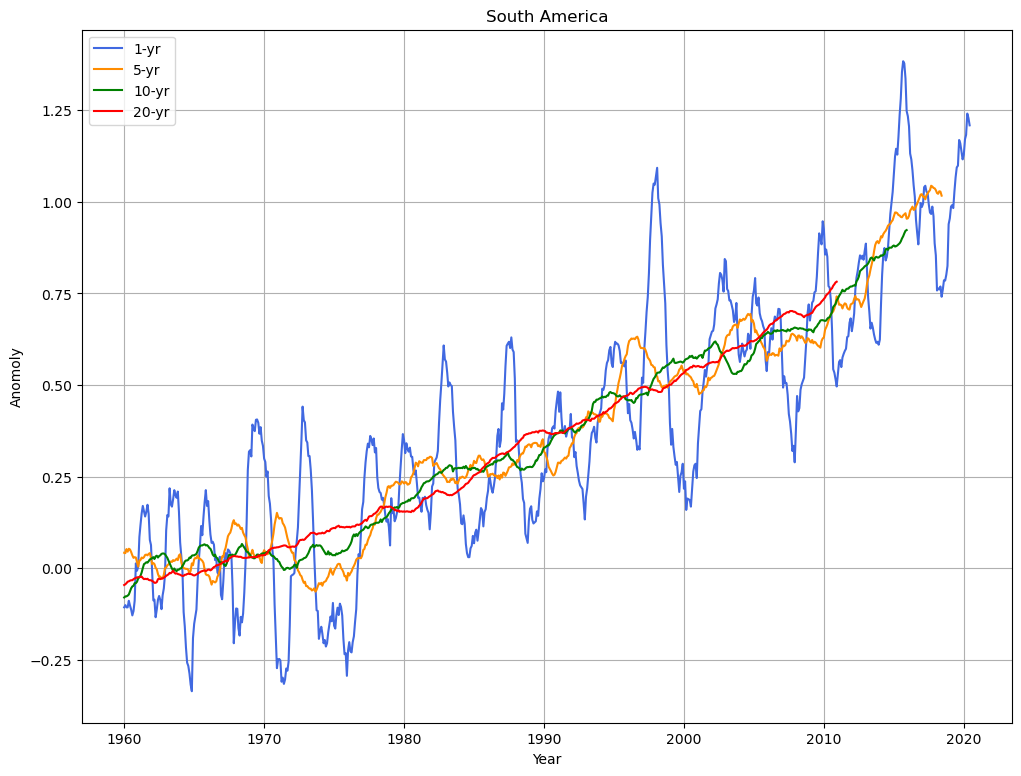

In [85]:
plot_region_anom(south_data, 'South America')

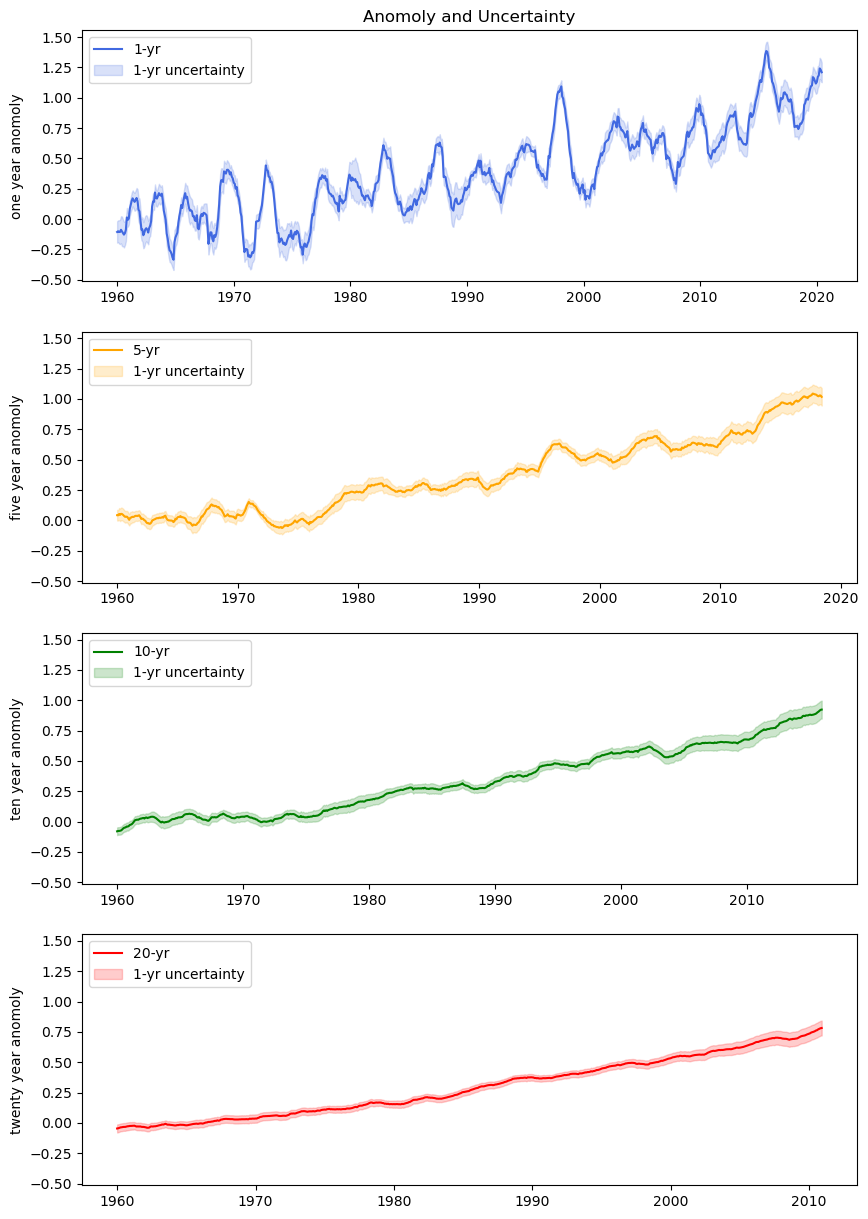

In [86]:
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(4, figsize=(10,15), sharey=True)

ax1.plot(south_data['timestamp'], south_data['one_yr_anom'], label='1-yr', color='royalblue')
ax1.fill_between(south_data.timestamp,
                 south_data['one_yr_anom'] - south_data['one_yr_unc'], 
                 south_data['one_yr_anom'] + south_data['one_yr_unc'], 
                 color='royalblue', alpha=0.2, label='1-yr uncertainty')
ax1.legend(loc=2)

ax2.plot(south_data['timestamp'], south_data['five_yr_anom'], label='5-yr', color='orange')
ax2.fill_between(south_data.timestamp,
                 south_data['five_yr_anom'] - south_data['five_yr_unc'], 
                 south_data['five_yr_anom'] + south_data['five_yr_unc'], 
                 color='orange', alpha=0.2, label='1-yr uncertainty')
ax2.legend(loc=2)

ax3.plot(south_data['timestamp'], south_data['ten_yr_anom'], label='10-yr', color='green')
ax3.fill_between(south_data.timestamp,
                 south_data['ten_yr_anom'] - south_data['ten_yr_unc'], 
                 south_data['ten_yr_anom'] + south_data['ten_yr_unc'], 
                 color='green', alpha=0.2, label='1-yr uncertainty')
ax3.legend(loc=2)

ax4.plot(south_data['timestamp'], south_data['twenty_yr_anom'], label='20-yr', color='red')
ax4.fill_between(south_data.timestamp,
                 south_data['twenty_yr_anom'] - south_data['twenty_yr_unc'], 
                 south_data['twenty_yr_anom'] + south_data['twenty_yr_unc'], 
                 color='red', alpha=0.2, label='1-yr uncertainty')
ax4.legend(loc=2)

ax1.set_title('Anomoly and Uncertainty')

ax1.set_ylabel('one year anomoly')
ax2.set_ylabel('five year anomoly')
ax3.set_ylabel('ten year anomoly')
ax4.set_ylabel('twenty year anomoly')

plt.show()

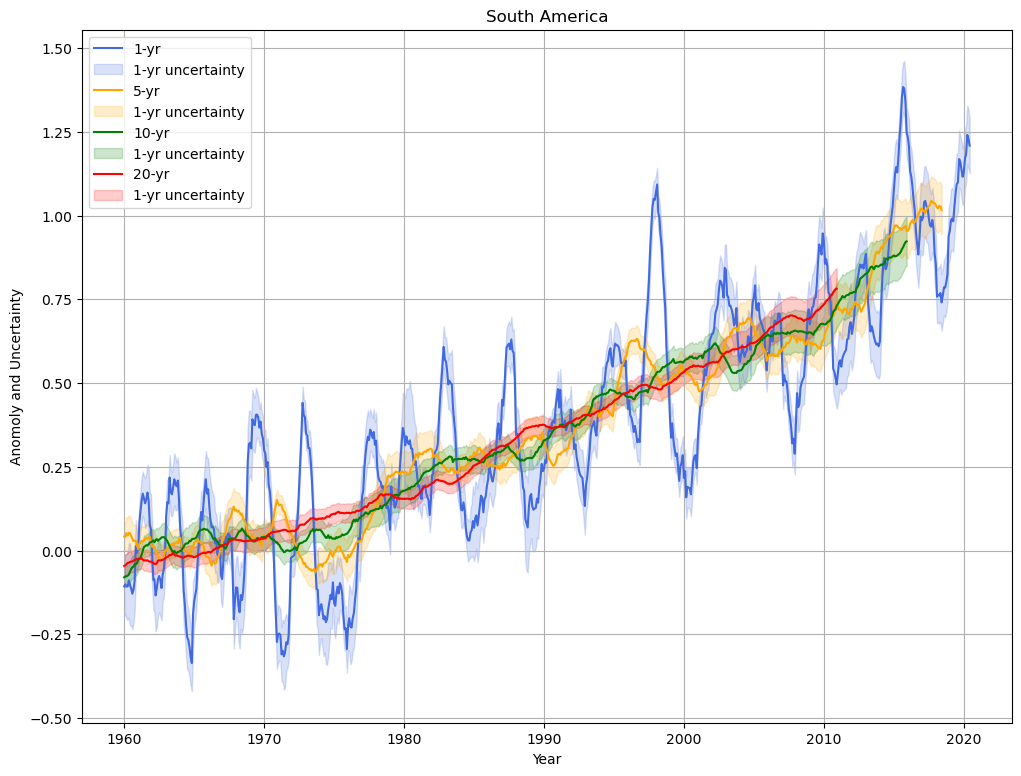

In [91]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_data['timestamp'], south_data['one_yr_anom'], label='1-yr', color='royalblue')
plt.fill_between(south_data.timestamp,
                 south_data['one_yr_anom'] - south_data['one_yr_unc'], 
                 south_data['one_yr_anom'] + south_data['one_yr_unc'], 
                 color='royalblue', alpha=0.2, label='1-yr uncertainty')


plt.plot(south_data['timestamp'], south_data['five_yr_anom'], label='5-yr', color='orange')
plt.fill_between(south_data.timestamp,
                 south_data['five_yr_anom'] - south_data['five_yr_unc'], 
                 south_data['five_yr_anom'] + south_data['five_yr_unc'], 
                 color='orange', alpha=0.2, label='1-yr uncertainty')

plt.plot(south_data['timestamp'], south_data['ten_yr_anom'], label='10-yr', color='green')
plt.fill_between(south_data.timestamp,
                 south_data['ten_yr_anom'] - south_data['ten_yr_unc'], 
                 south_data['ten_yr_anom'] + south_data['ten_yr_unc'], 
                 color='green', alpha=0.2, label='1-yr uncertainty')

plt.plot(south_data['timestamp'], south_data['twenty_yr_anom'], label='20-yr', color='red')
plt.fill_between(south_data.timestamp,
                 south_data['twenty_yr_anom'] - south_data['twenty_yr_unc'], 
                 south_data['twenty_yr_anom'] + south_data['twenty_yr_unc'], 
                 color='red', alpha=0.2, label='1-yr uncertainty')
plt.legend(loc=2)

plt.grid()
plt.title('South America')
plt.ylabel('Anomoly and Uncertainty')
plt.xlabel('Year')

plt.show()

In [88]:

def plot_region_uncertainty(region_data, chart_title):
    fig, ax = plt.subplots(figsize=(12,9))

    plt.plot(region_data['timestamp'], region_data['one_yr_anom'], label='1-yr', color='royalblue')
    plt.fill_between(region_data.timestamp,
                    region_data['one_yr_anom'] - region_data['one_yr_unc'], 
                    region_data['one_yr_anom'] + region_data['one_yr_unc'], 
                    color='royalblue', alpha=0.2, label='1-yr uncertainty')


    plt.plot(region_data['timestamp'], region_data['five_yr_anom'], label='5-yr', color='orange')
    plt.fill_between(region_data.timestamp,
                    region_data['five_yr_anom'] - region_data['five_yr_unc'], 
                    region_data['five_yr_anom'] + region_data['five_yr_unc'], 
                    color='orange', alpha=0.2, label='1-yr uncertainty')

    plt.plot(region_data['timestamp'], region_data['ten_yr_anom'], label='10-yr', color='green')
    plt.fill_between(region_data.timestamp,
                    region_data['ten_yr_anom'] - region_data['ten_yr_unc'], 
                    region_data['ten_yr_anom'] + region_data['ten_yr_unc'], 
                    color='green', alpha=0.2, label='1-yr uncertainty')

    plt.plot(region_data['timestamp'], region_data['twenty_yr_anom'], label='20-yr', color='red')
    plt.fill_between(region_data.timestamp,
                    region_data['twenty_yr_anom'] - region_data['twenty_yr_unc'], 
                    region_data['twenty_yr_anom'] + region_data['twenty_yr_unc'], 
                    color='red', alpha=0.2, label='1-yr uncertainty')
    plt.legend(loc=2)

    # plt.grid()
    plt.title(chart_title)
    plt.ylabel('Anomoly and Uncertainty')
    plt.xlabel('Year')

    plt.show()



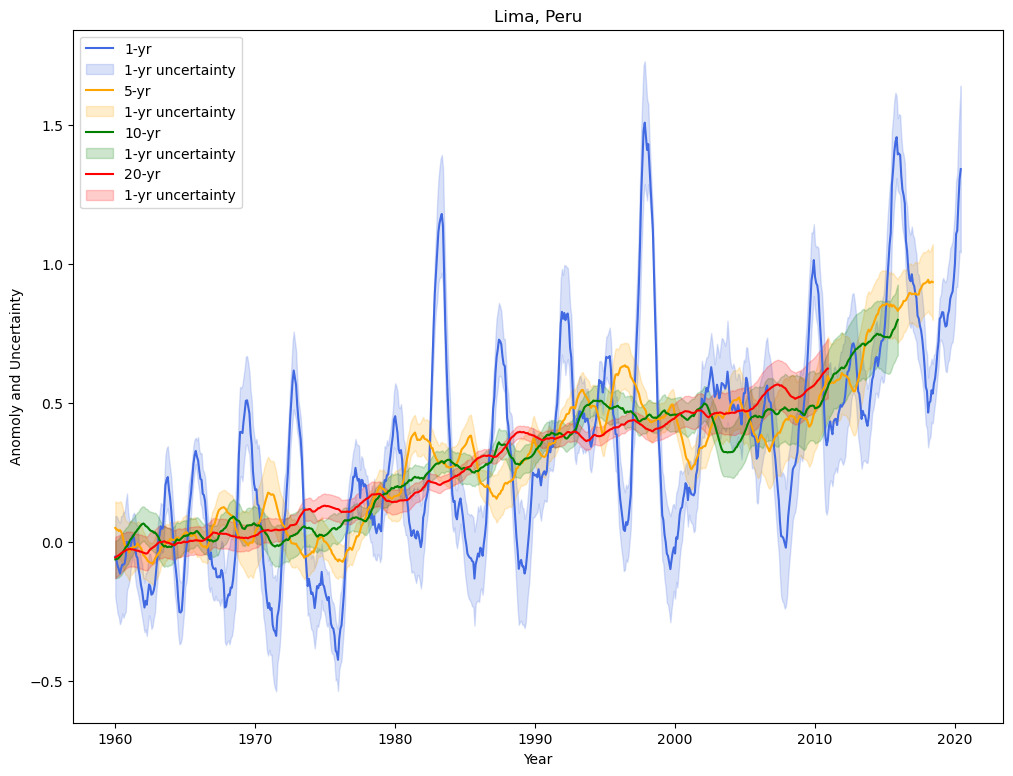

In [77]:
plot_region_uncertainty(lima_data, 'Lima, Peru')

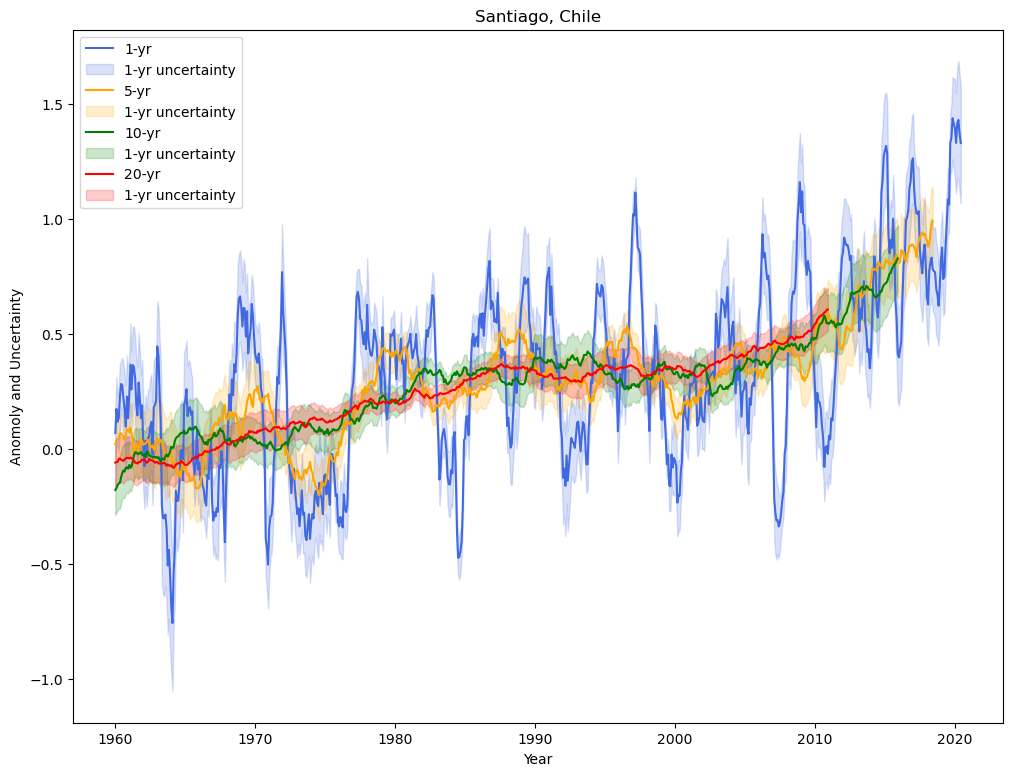

In [78]:
plot_region_uncertainty(santiago_data, 'Santiago, Chile')

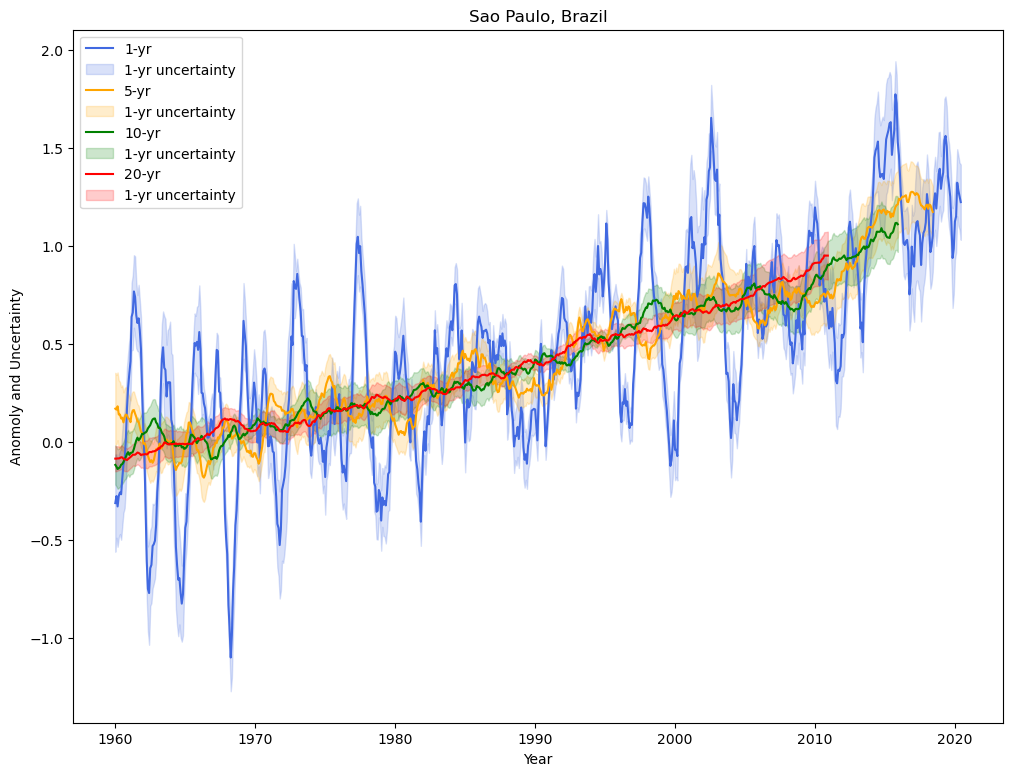

In [79]:
plot_region_uncertainty(saopaulo_data, 'Sao Paulo, Brazil')

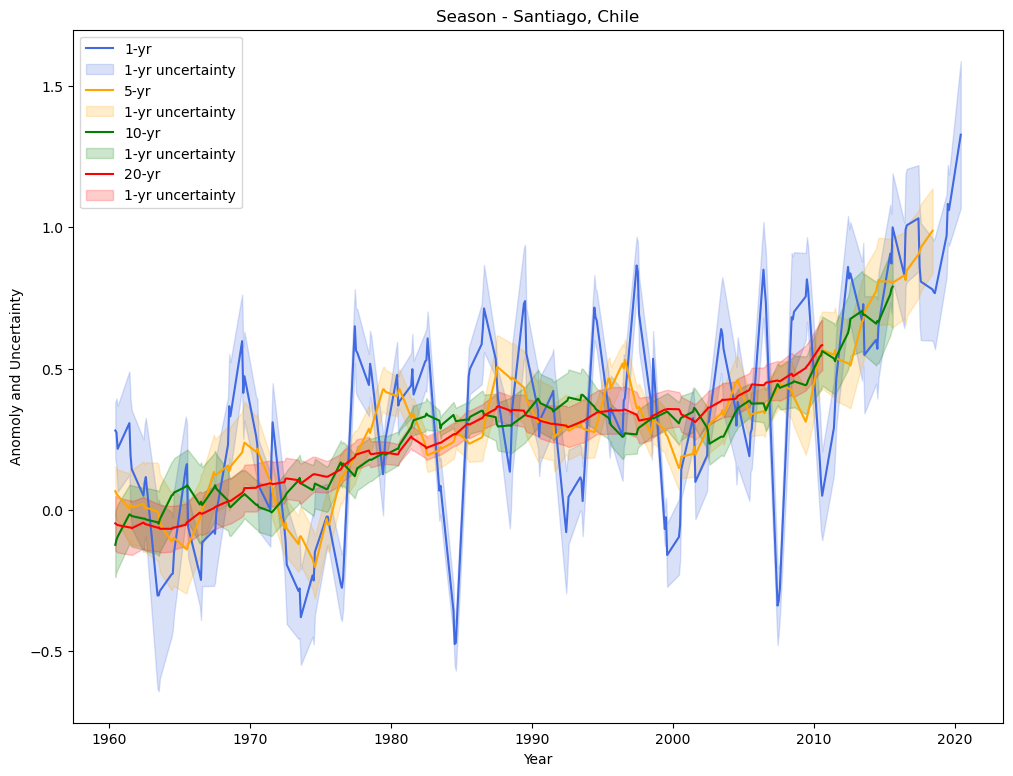

In [90]:
plot_region_uncertainty(santiago_winter, 'Season - Santiago, Chile')

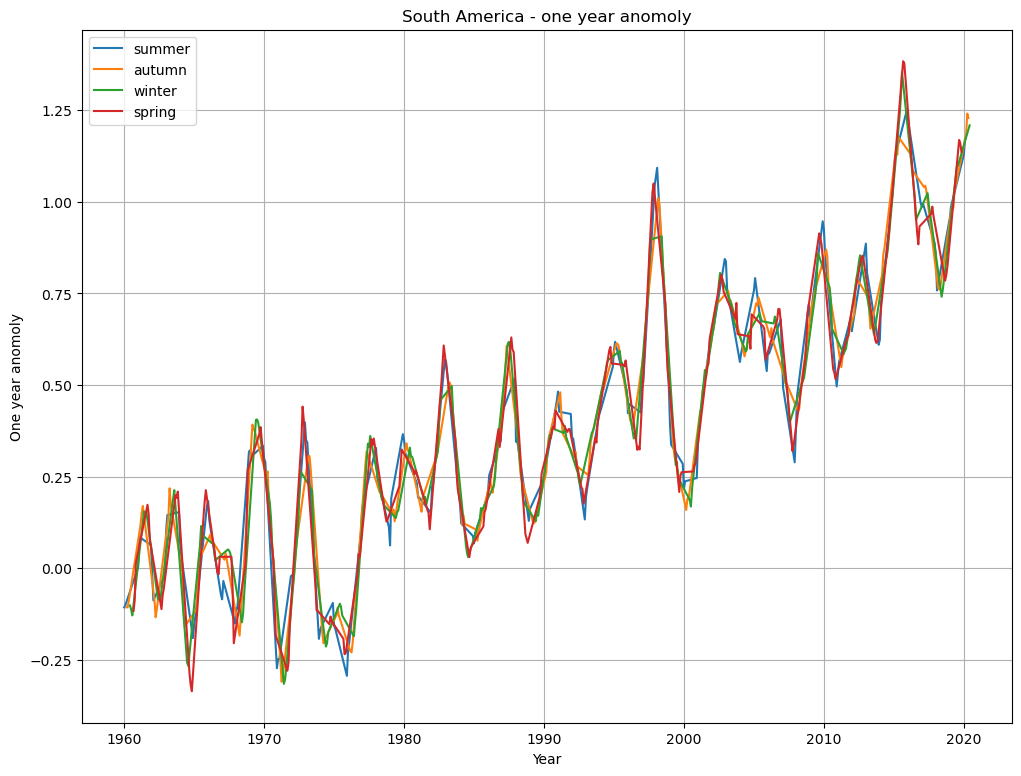

In [53]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_summer['timestamp'], south_america_summer['one_yr_anom'])
plt.plot(south_america_autumn['timestamp'], south_america_autumn['one_yr_anom'])
plt.plot(south_america_winter['timestamp'], south_america_winter['one_yr_anom'])
plt.plot(south_america_spring['timestamp'], south_america_spring['one_yr_anom'])

plt.title('South America - one year anomoly')
plt.xlabel('Year')
plt.ylabel('One year anomoly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()


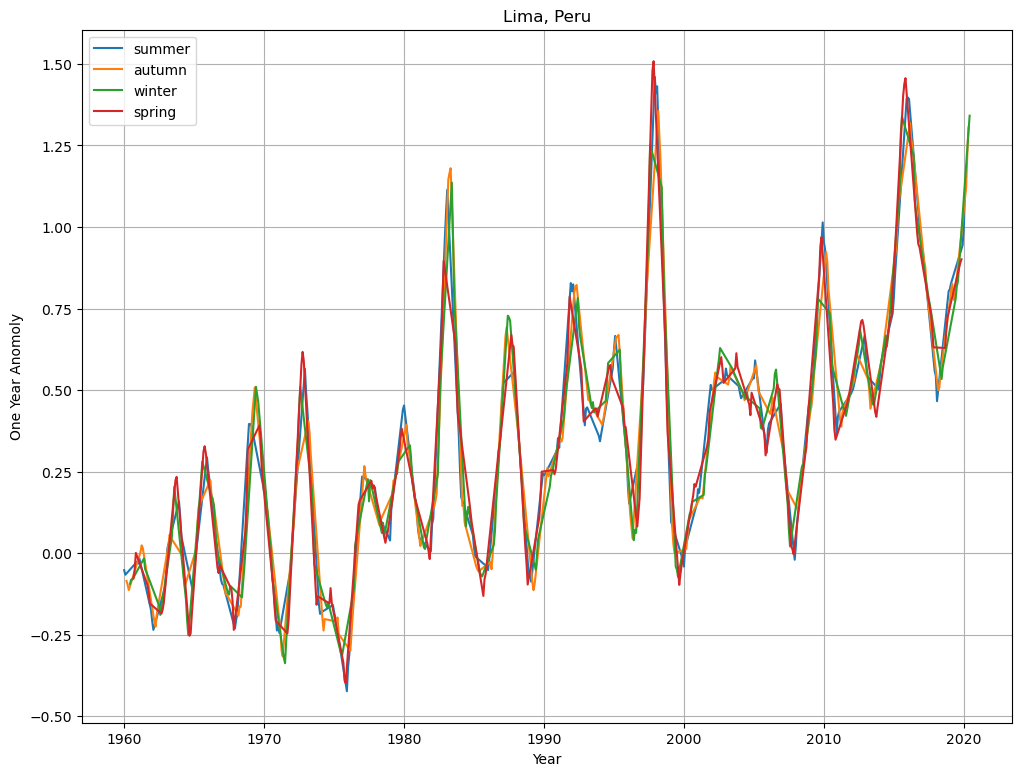

In [27]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(lima_summer['timestamp'], lima_summer['one_yr_anom'])
plt.plot(lima_autumn['timestamp'], lima_autumn['one_yr_anom'])
plt.plot(lima_winter['timestamp'], lima_winter['one_yr_anom'])
plt.plot(lima_spring['timestamp'], lima_spring['one_yr_anom'])

plt.title('Lima, Peru')
plt.xlabel('Year')
plt.ylabel('One Year Anomoly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()

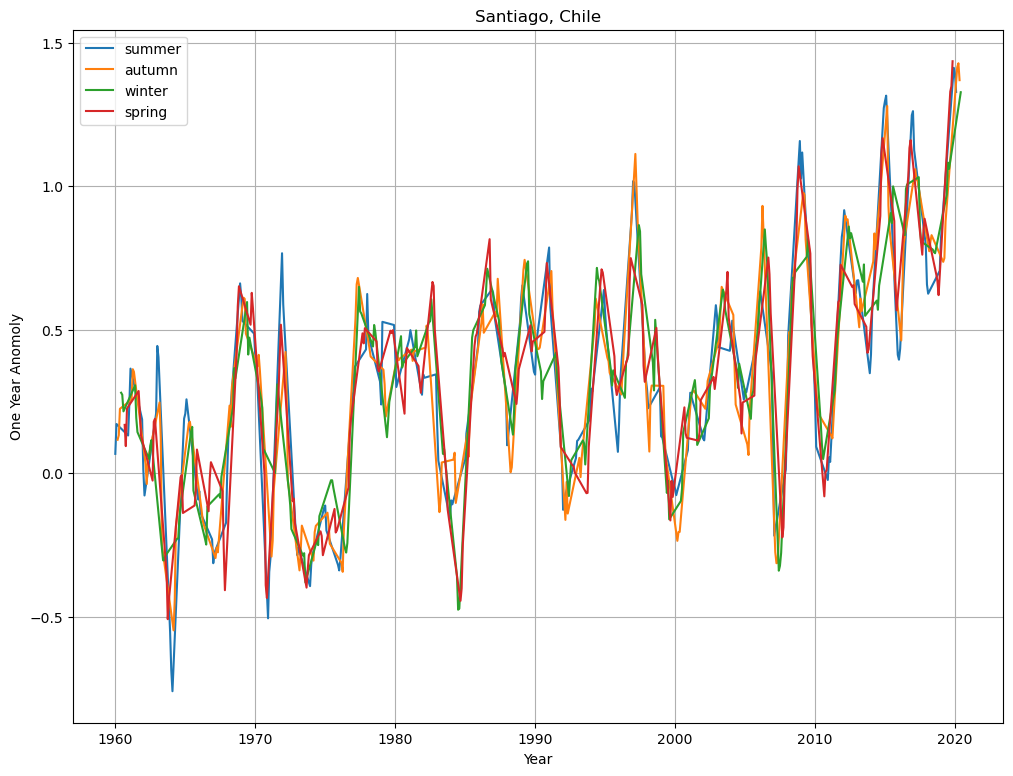

In [28]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(santiago_summer['timestamp'], santiago_summer['one_yr_anom'])
plt.plot(santiago_autumn['timestamp'], santiago_autumn['one_yr_anom'])
plt.plot(santiago_winter['timestamp'], santiago_winter['one_yr_anom'])
plt.plot(santiago_spring['timestamp'], santiago_spring['one_yr_anom'])

plt.title('Santiago, Chile')
plt.xlabel('Year')
plt.ylabel('One Year Anomoly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()

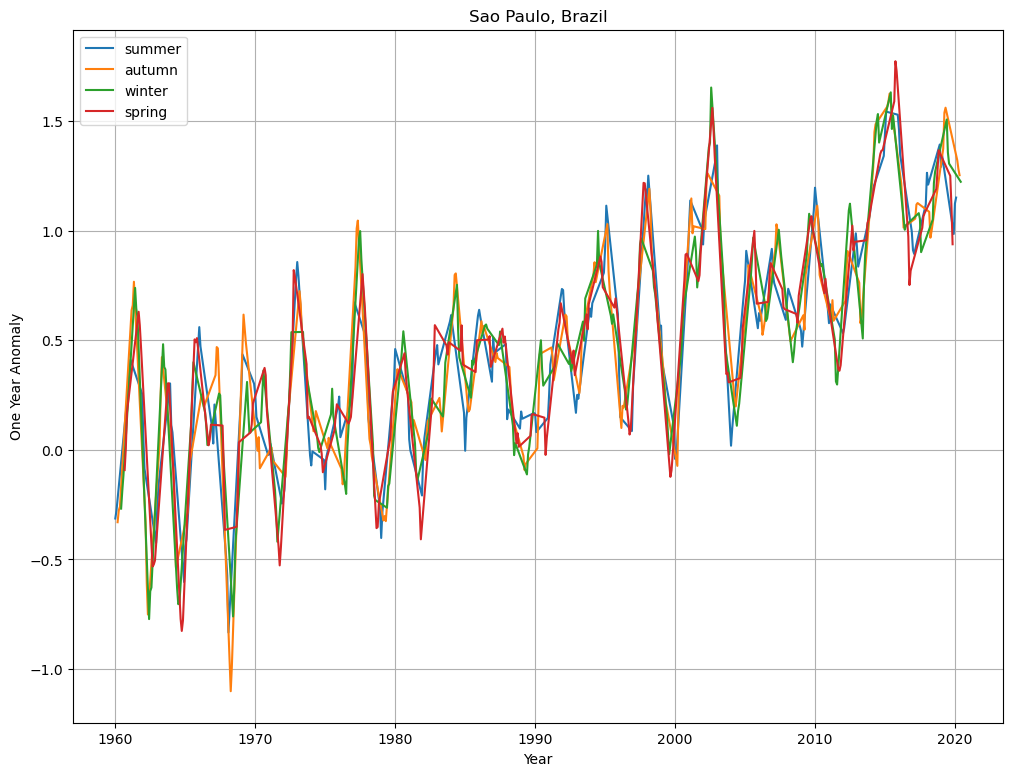

In [29]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(saopaulo_summer['timestamp'], saopaulo_summer['one_yr_anom'])
plt.plot(saopaulo_autumn['timestamp'], saopaulo_autumn['one_yr_anom'])
plt.plot(saopaulo_winter['timestamp'], saopaulo_winter['one_yr_anom'])
plt.plot(saopaulo_spring['timestamp'], saopaulo_spring['one_yr_anom'])

plt.title('Sao Paulo, Brazil')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()

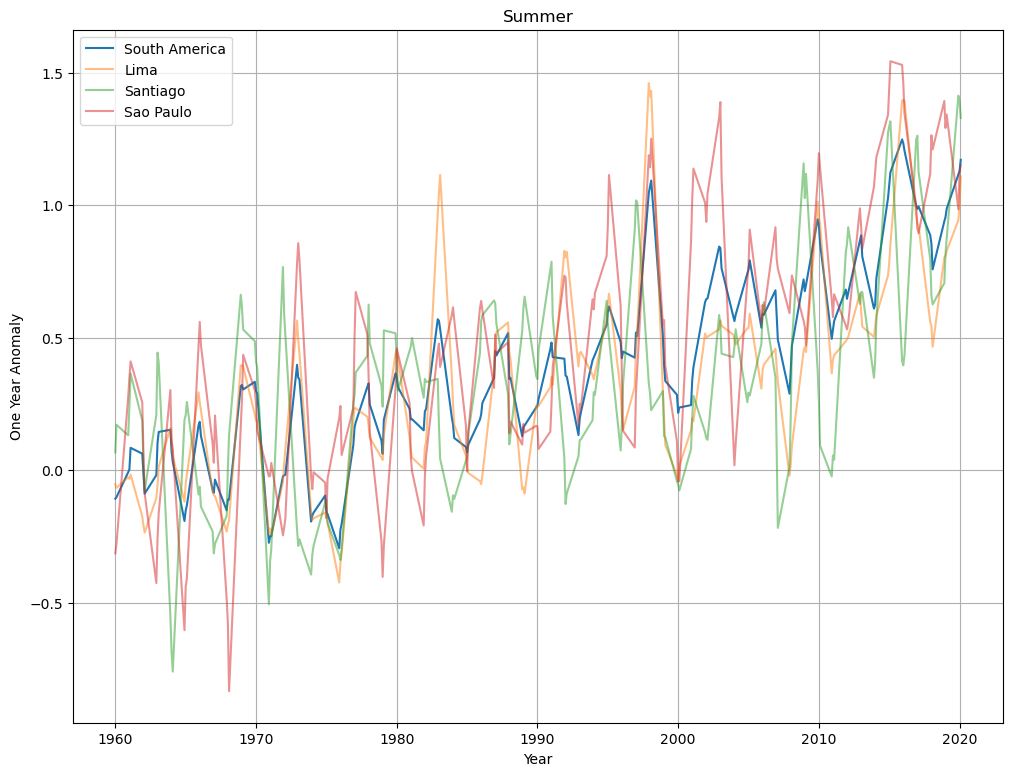

In [30]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_summer['timestamp'], south_america_summer['one_yr_anom'])
plt.plot(lima_summer['timestamp'], lima_summer['one_yr_anom'], alpha=0.5)
plt.plot(santiago_summer['timestamp'], santiago_summer['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_summer['timestamp'], saopaulo_summer['one_yr_anom'], alpha=0.5)

plt.title('Summer')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()

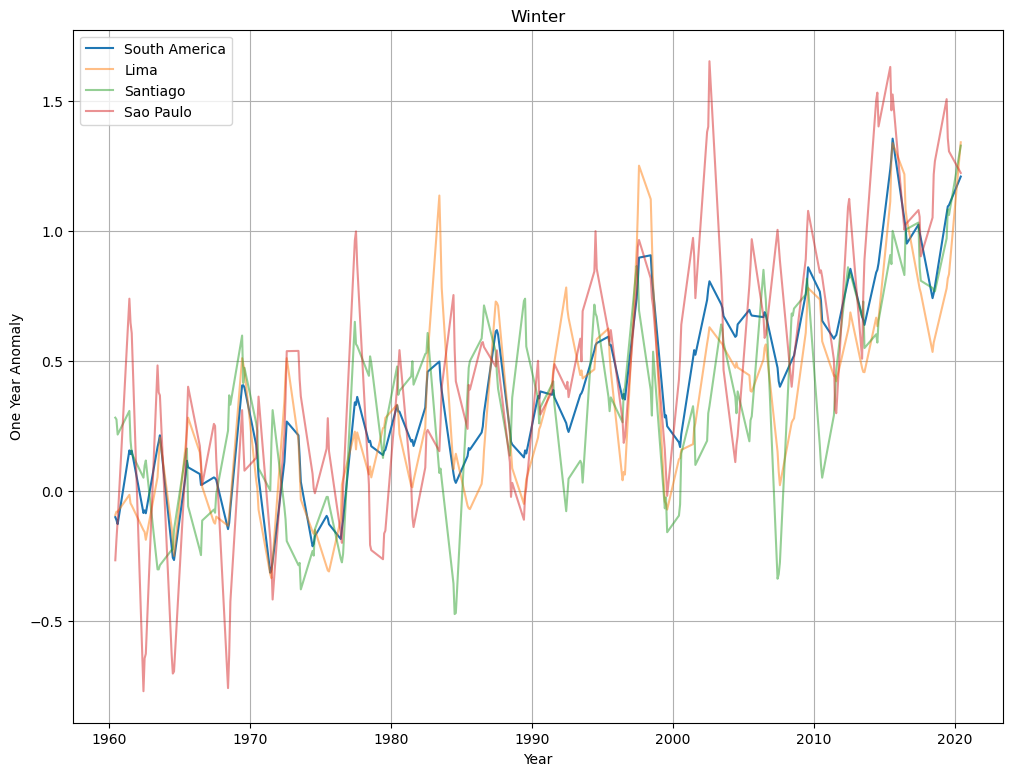

In [31]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_winter['timestamp'], south_america_winter['one_yr_anom'])
plt.plot(lima_winter['timestamp'], lima_winter['one_yr_anom'], alpha=0.5)
plt.plot(santiago_winter['timestamp'], santiago_winter['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_winter['timestamp'], saopaulo_winter['one_yr_anom'], alpha=0.5)

plt.title('Winter')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()

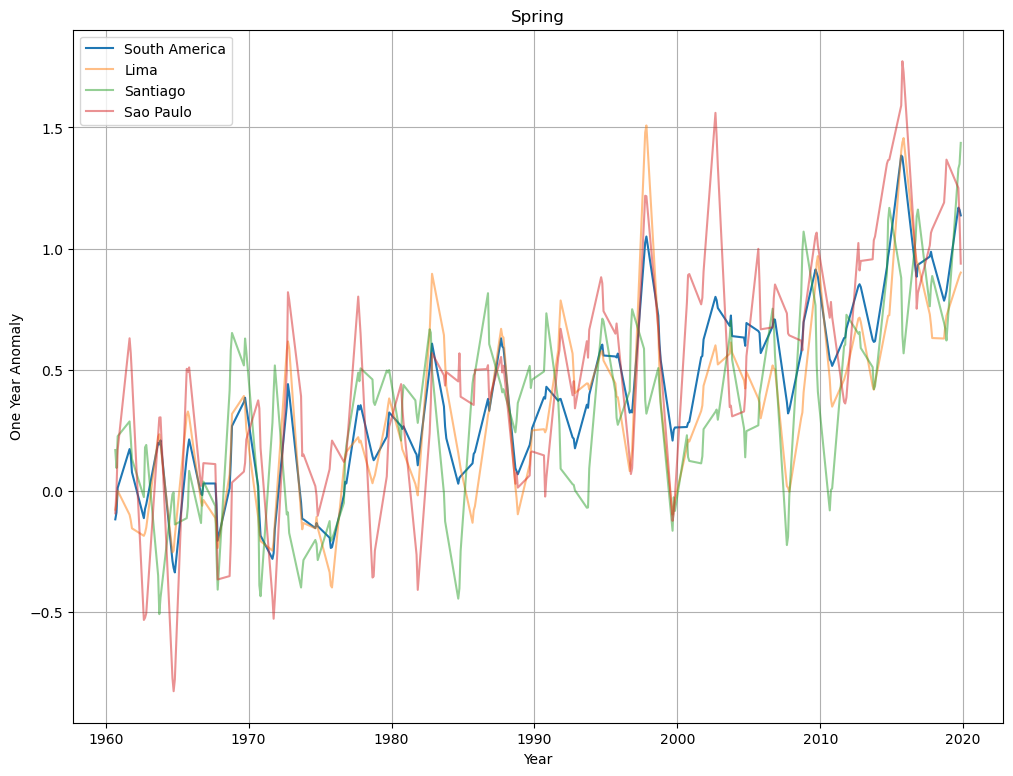

In [32]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_spring['timestamp'], south_america_spring['one_yr_anom'])
plt.plot(lima_spring['timestamp'], lima_spring['one_yr_anom'], alpha=0.5)
plt.plot(santiago_spring['timestamp'], santiago_spring['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_spring['timestamp'], saopaulo_spring['one_yr_anom'], alpha=0.5)

plt.title('Spring')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()

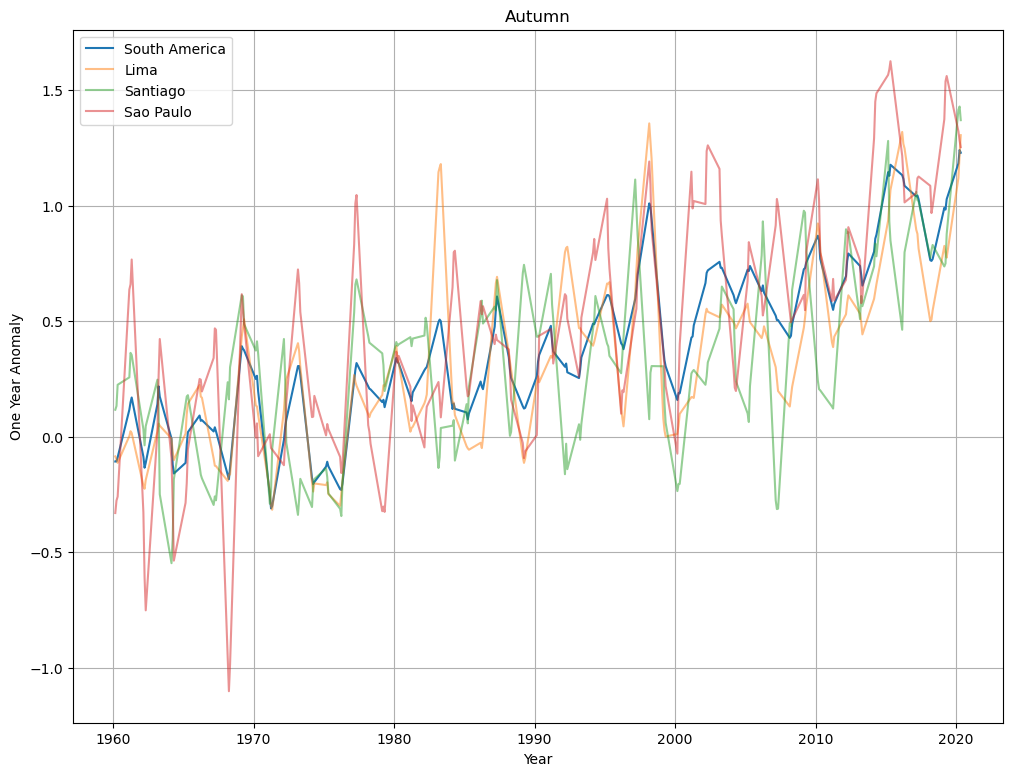

In [33]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_autumn['timestamp'], south_america_autumn['one_yr_anom'])
plt.plot(lima_autumn['timestamp'], lima_autumn['one_yr_anom'], alpha=0.5)
plt.plot(santiago_autumn['timestamp'], santiago_autumn['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_autumn['timestamp'], saopaulo_autumn['one_yr_anom'], alpha=0.5)

plt.title('Autumn')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()

### Testing Cells Below

In [34]:
df_south_america_import = pd.read_csv(south_america_file, sep='\t', header=None, skiprows=71)
# df_south_america_import
sa_col= df_south_america_import[0]
sa_col[0]


'  1856     1    -0.121  0.826       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN'

In [35]:
# make data frame
weather_cols = ['year', 'month', 'monthly_anom', 'monthly_unc', 'one_yr_anom', 'one_yr_unc', 'five_yr_anom', 'five_yr_unc', 'ten_yr_anom', 'ten_yr_unc', 'twenty_yr_anom', 'twenty_yr_unc']
df_sa = pd.DataFrame(columns=weather_cols)

for row in range(0, len(sa_col)):
    test = list(map(str, sa_col[row].split()))

    add_row = {}

    for i in range(0,len(test)):
        add_row = {'year': test[0], 
                'month': test[1],
                'monthly_anom': test[2],
                'monthly_unc': test[3], 
                'one_yr_anom': test[4], 
                'one_yr_unc': test[5], 
                'five_yr_anom': test[6], 
                'five_yr_unc': test[7], 
                'ten_yr_anom': test[8], 
                'ten_yr_unc': test[9], 
                'twenty_yr_anom': test[10], 
                'twenty_yr_unc': test[11]}
        
    df_sa = df_sa._append(add_row, ignore_index=True)
    
display(df_sa)


,year,month,monthly_anom,monthly_unc,one_yr_anom,one_yr_unc,five_yr_anom,five_yr_unc,ten_yr_anom,ten_yr_unc,twenty_yr_anom,twenty_yr_unc
0,1856,1,-0.121,0.826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1856,2,-1.078,1.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1856,3,-1.080,0.890,-0.834,0.373,NaN,NaN,NaN,NaN,NaN,NaN
3,1856,4,-0.524,0.856,-0.850,0.381,NaN,NaN,NaN,NaN,NaN,NaN
4,1856,5,-0.950,0.913,-0.824,0.386,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2020,8,1.344,0.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,2020,9,1.514,0.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,2020,10,1.636,0.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,2020,11,1.182,0.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
